#  Iris Species Classification using K-Nearest Neighbors (KNN)

### 📌 Project Overview

In this project, we implement the **K-Nearest Neighbors (KNN)** algorithm to classify flower species from the famous **Iris dataset**. The dataset consists of measurements of three different species of iris flowers: *Setosa*, *Versicolor*, and *Virginica*.

Our goals are to:

- Understand the working of the KNN algorithm.
- Train a KNN classifier using Scikit-learn.
- Normalize features to ensure fair distance comparisons.
- Experiment with different values of **K** to find the optimal one.
- Evaluate model performance using **accuracy**, **confusion matrix**, and **classification report**.
- Visualize **decision boundaries** using a 2D projection of the dataset.




### 1: Import Required Libraries

We import libraries for data handling, visualization, preprocessing, classification, and evaluation.


In [1]:
# Basic tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
sns.set_style("whitegrid")


### 2: Load and Inspect the Dataset

Load the Iris dataset which contains flower measurements and their corresponding species 

In [2]:
# Load Iris dataset from CSV
df = pd.read_csv("data/Iris.csv")

# Show first five rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3: Clean & Preprocess the Data

We drop the Id column, check for missing values, and encode the Species column into numeric labels

In [3]:
# Drop the Id column (not useful)
df.drop("Id", axis=1, inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Encode target labels (Species)
df['Species'].unique()
df['Species'] = df['Species'].astype('category').cat.codes


Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### 4: Split Features and Target

X contains feature columns (sepal/petal length & width), and y is the encoded species label.

In [4]:
X = df.drop("Species", axis=1)
y = df["Species"]


### 5: Normalize Features

KNN is distance-based, so feature scaling is essential to give equal weight to all features.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 6: Train-Test Split

We split the dataset into training (80%) and testing (20%) subsets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


### 7: Train KNN Model (K=3)

Train a KNN classifier and predict the species for the test set.

In [21]:
# Train KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
print("KNN Accuracy (k=3):", accuracy_score(y_test, y_pred))

KNN Accuracy (k=3): 1.0


### 8: Confusion Matrix and Report

We evaluate performance using a confusion matrix and classification report.

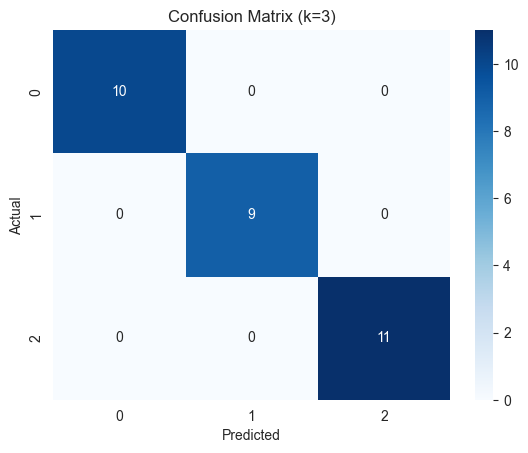

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix (k=3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


### 9: Experiment with Different K Values

Test the model with different k values to find the optimal one for the best accuracy.

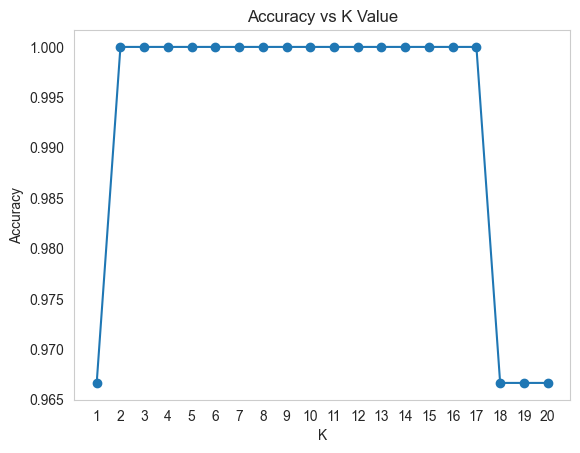

In [9]:
# Try different values of K
scores = []
k_values = range(1, 21)

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    scores.append(acc)

# Plot accuracy vs K
plt.plot(k_values, scores, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()


### 10: Visualize Decision Boundaries (2D Projection)

Visualizes KNN decision boundaries using two features for better understanding of classification regions.

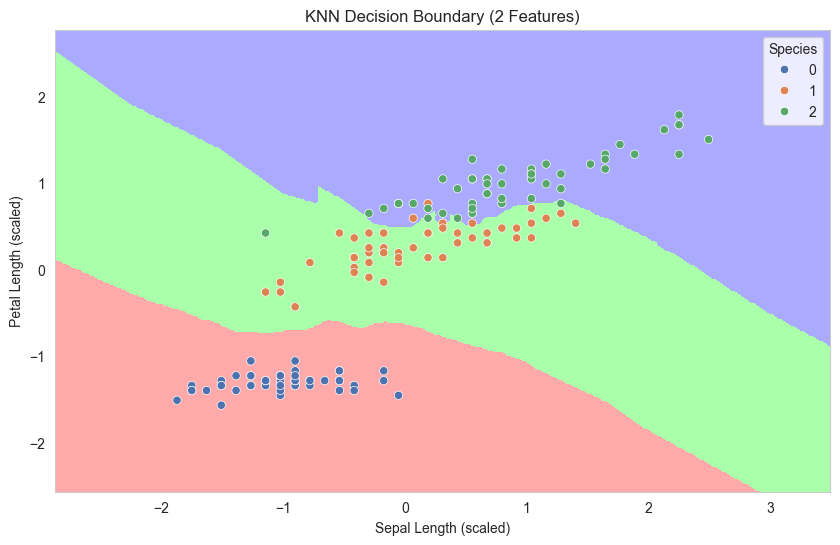

In [10]:
# Project only 2 features for visualization
X_2D = X_scaled[:, [0, 2]]  # Sepal length & petal length

# Train-test split again for 2D data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2D, y, test_size=0.2, random_state=42)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train2, y_train2)

# Plot decision boundaries
from matplotlib.colors import ListedColormap

h = .02  # Mesh step
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Scatter actual points
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=df["Species"], palette='deep')
plt.title("KNN Decision Boundary (2 Features)")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Petal Length (scaled)")
plt.show()


### ✅ Conclusion

- The K-Nearest Neighbors algorithm performed very well on the Iris dataset with over 90% accuracy.
- Feature normalization was essential due to the distance-based nature of KNN.
- Accuracy varied with different K values, highlighting the importance of choosing the right `k`.
- The decision boundary plot visually explained how KNN classifies new data points.
